# K-nearest neighbors

In [1]:
# Example of getting neighbors for an instance
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        #if dist != 0.0:
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Test distance function
dataset = np.array([[2.7810836,2.550537003,0],
                    [1.465489372,2.362125076,0],
                    [3.396561688,4.400293529,0],
                    [1.38807019,1.850220317,0],
                    [3.06407232,3.005305973,0],
                    [7.627531214,2.759262235,1],
                    [5.332441248,2.088626775,1],
                    [6.922596716,1.77106367,1],
                    [8.675418651,-0.242068655,1],
                    [7.673756466,3.508563011,1]])

#plt.scatter(dataset[:, 0], dataset[:, 1],c = dataset[:,2], s=50, cmap='viridis')
#plt.show()

print("Target = ",dataset[0])

neighbors = np.array(get_neighbors(dataset, dataset[0], 1))
for neighbor in neighbors:
    print(neighbor)

plt.scatter(dataset[:, 0], dataset[:, 1],c = dataset[:,2], s=30, cmap='viridis')
plt.scatter(neighbors[:, 0], neighbors[:, 1], c='red', s=200, alpha=0.7)
plt.scatter(dataset[0,0], dataset[0,1], c='green', s=100, alpha=0.7)
plt.show()


Target =  [2.7810836 2.550537  0.       ]
[2.7810836 2.550537  0.       ]


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 640x480 with 1 Axes>

# SK-Learn

result =  (array([[0.]]), array([[0]]))


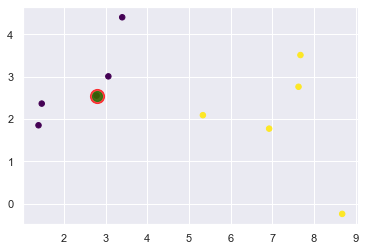

In [2]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(dataset[:, :2], dataset[:,2])

result = neigh.kneighbors(dataset[0,:2].reshape(1,2))
print("result = ",result) #distance and index

#Plot all points
plt.scatter(dataset[:, 0], dataset[:, 1],c = dataset[:,2], s=30, cmap='viridis')
#Plot neighbors
plt.scatter(dataset[result[1][0:], 0], dataset[result[1][0:], 1], c='red', s=200, alpha=0.7)
#Plot target
plt.scatter(dataset[0,0], dataset[0,1], c='green', s=100, alpha=0.7)
plt.show()


In [3]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(dataset[:, :2], dataset[:,2])

test = np.array([[3.0,2.0]])

print(neigh.predict(test.reshape(1,2)))

[0.]


# K-NN with real data

In [4]:
from sklearn import datasets
data = datasets.load_iris()
print(data.DESCR)
print(data.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

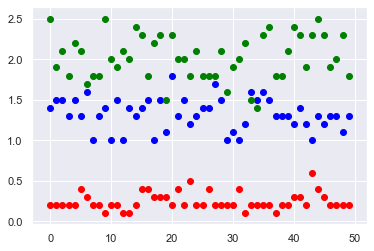

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
x = range(50)
plt.scatter(x,data.data[:50,3],color='red') #petal width of Setosa
plt.scatter(x,data.data[50:100,3],color='blue') #petal width of Versicolour 
plt.scatter(x,data.data[100:,3],color='green') #petal width of Virginica

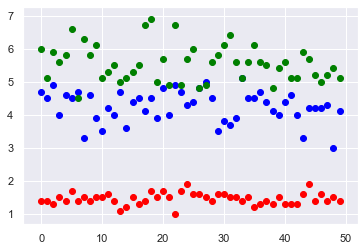

In [6]:
plt.scatter(x,data.data[:50,2],color='red') #petal length of Setosa
plt.scatter(x,data.data[50:100,2],color='blue') #petal length of Versicolour 
plt.scatter(x,data.data[100:,2],color='green') #petal length of Virginica

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data[:,2:4], data.target, test_size=0.2, random_state=42,stratify=data.target)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}'.format(X_test.shape,y_test.shape))

Train Shape X: (120, 2) Y : (120,)
Test Shape X: (30, 2) Y : (30,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)
answer = knn.predict(X_test)
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.2, random_state=42,stratify=data.target)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train) 

answer = knn.predict(X_test)
print(classification_report(y_test, answer))

NameError: name 'X' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,11)}
knn_best = GridSearchCV(knn, parameters, cv=5)
knn_best.fit(X_train,y_train)
print(knn_best.best_estimator_)
answer = knn_best.predict(X_test)
print(classification_report(y_test, answer))